# Chapter 4: A Step Beyond K-nn: Decision Trees

* more hyperparameters

* still use neighborhoods to make predictions (but in a more sophisticated way)

## 4.1. Basics of DT

* similar to a flow chart

* we start at the top of the tree and partition based on whether or not a feature value is smaller ot larger than the node (for regression) or equal to that class or not (for classification)

  * eg. *recursive partitioning*

  * there have been different methods of splitting (which we will discuss

* top node, is root; branches end at *leaf nodes* or *terminal nodes*

* our predicted Y is the average of all the Y of the node we stop at

* non-parametric, white box 

* **Categorical Variable Decision Tree**: has a categorical response variable


* **Continuous Variable Decision Tree**: has a continuous target response variable


![source: https://www.cs.cmu.edu/~bhiksha/courses/10-601/decisiontrees/](https://www.cs.cmu.edu/~bhiksha/courses/10-601/decisiontrees/DT.png)

* example: predicting contact lense type

## 4.2. Sklearn DT

### 4.2.1. The Data

In [8]:
import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_4/airq'

# load CSV using pandas library
airq = pd.read_csv(my_path)
airq = airq.iloc[:,1:]
# look at the first few rows and show features 
airq.head()
#irq.info()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,28,NaN,14.9,66,5,6


* lets get rid of those 5 rows with NaN

In [0]:
airq["Solar.R"] = airq["Solar.R"].fillna(round(airq["Solar.R"].mean()))

### 4.2.2. Fitting the Data

* sickit learn also has DT tools

* we would use DecisionTreeClassifier for classification applications

* we fit the model on the X and Y as usual:

In [0]:
from sklearn import tree

X = airq.iloc[:,1:]
Y = pd.DataFrame(airq.iloc[:,0])

clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X, Y)

* the maxdepth argument indicates we would like at most 3 levels of the tree


* lets make a plot of the decsion path using sklearn plot_tree method and matplotlib.pyplot as below

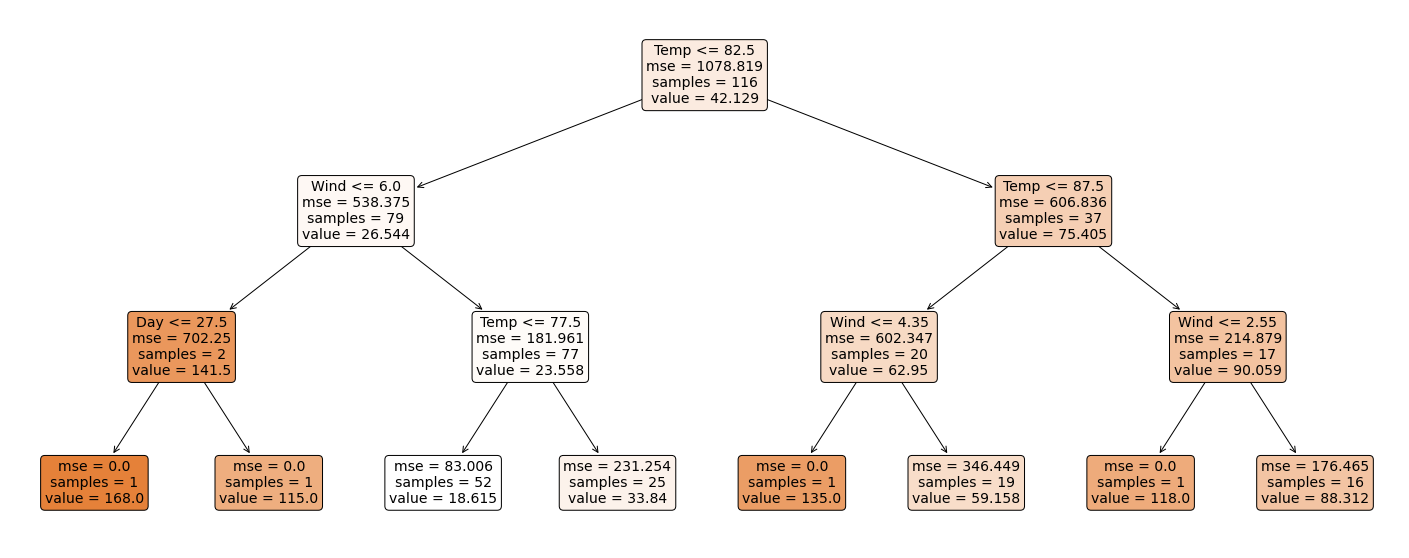

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=airq.columns.tolist()[1:], 
              class_names=airq.columns.tolist()[0], 
              filled=True, 
              rounded=True, 
              fontsize=14)

* as we traverse down the tree, at each node a decision is made as to whether or not a feature is greater or less than a certain value

  * also shows how many samples are in that subset of our original training data and MSE for predicted value at that node

* if we traverse the far left branch for example, we would predict 115 since we land at the left-most leaf

  * the (only) row meeting this condition can be extracted and then applied to predict to return this value as shown below

In [0]:
far_left_branch = airq[ (airq['Wind'] <= 6) & (airq['Temp'] <= 82.5) & (airq['Month'] <= 6.5)] 
print(far_left_branch) 
# note that the actual value is 115 since the MSE above is 0
y_pred = clf.predict(far_left_branch.iloc[:,1:])
y_pred

    Ozone  Solar.R  Wind  Temp  Month  Day
24    115    223.0   5.7    79      5   30


array([115.])

* lets try another path where the MSE is not 0

In [0]:
far_right_branch = airq[ (airq['Wind'] > 2.55) & (airq['Temp'] > 87.5)] 
print(far_right_branch)
print(far_right_branch.shape) # 16 rows as shown above

y_pred = clf.predict(far_right_branch.iloc[:,1:])
pd.DataFrame(y_pred).round(3)

    Ozone  Solar.R  Wind  Temp  Month  Day
27     71    291.0  13.8    90      6    9
40     77    276.0   5.1    88      7    7
41     97    267.0   6.3    92      7    8
42     97    272.0   5.7    92      7    9
43     85    175.0   7.4    89      7   10
57     82    213.0   7.4    88      7   28
67    122    255.0   4.0    89      8    7
68     89    229.0  10.3    90      8    8
69    110    207.0   8.0    90      8    9
83     76    203.0   9.7    97      8   28
85     84    237.0   6.3    96      8   30
86     85    188.0   6.3    94      8   31
87     96    167.0   6.9    91      9    1
88     78    197.0   5.1    92      9    2
89     73    183.0   2.8    93      9    3
90     91    189.0   4.6    93      9    4
(16, 6)


,0
0,88.312
1,88.312
2,88.312
3,88.312
4,88.312
5,88.312
6,88.312
7,88.312
8,88.312
9,88.312


* see all predictions are the 88.3125 becasue the predcition stopped on the leaf on the far right but the actual ozone values are not  

In [0]:
def findOverallLoss(ypreds,Y):
  err = (ypreds.reset_index(drop=True).T - Y.reset_index(drop=True).values.squeeze()) ** 2
  MAPE = err.mean(axis=1)
  return MAPE

* it calculates the MSE shown on the leaves using ** 2 instead of abs()

In [0]:
findOverallLoss(pd.DataFrame(y_pred),far_right_branch.iloc[:,0])

0    176.464844
dtype: float64

* note that if we did not give a depth input the tree would be an exact match to the training data (a leaf for every data point) and would have an overallLoss of 0

  * so we must avoid overfitting
  * it is ok if some leaves have a MSE > 0

0    0.0
dtype: float64

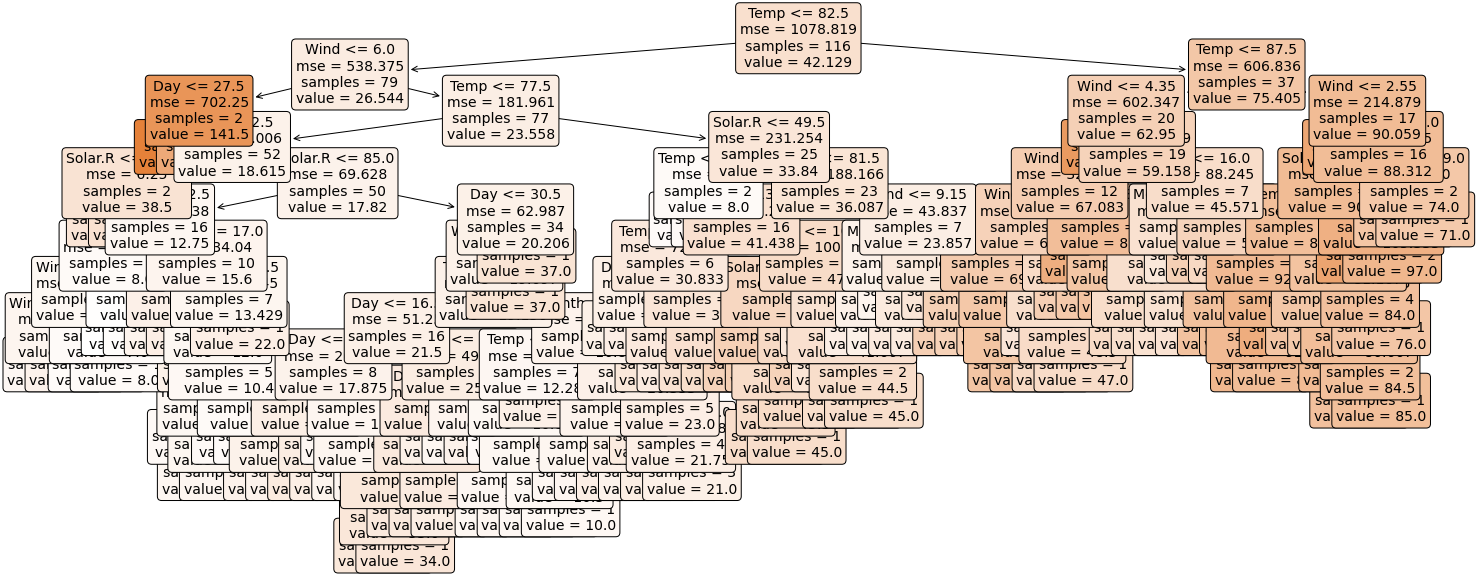

In [0]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=airq.columns.tolist()[1:], 
              class_names=airq.columns.tolist()[0], 
              filled=True, 
              rounded=True, 
              fontsize=14)
y_pred = clf.predict(far_right_branch.iloc[:,1:])
pd.DataFrame(y_pred).round(3)
findOverallLoss(pd.DataFrame(y_pred),far_right_branch.iloc[:,0])

### 4.2.7. Other Helper Functions

In [0]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X, Y)

* `sklearn` `_tree` allows us to print out the features, values, childrens' node numbers, and thresholds at nodes 




In [0]:
from sklearn.tree import _tree
tree_ = clf.tree_

# gives the index # of the feature in X (in airq.columns.tolist()[1:]) 
# for each corresponding node (which is the index of tree._feature)
print(tree_.feature)

# so the following two lines create a list of the feature names replaced by the values
feature_names = airq.columns.tolist()[1:]
print(feature_names)
feature_name = [ feature_names[i] for i in tree_.feature ]
print(feature_name)

# we can also print the corresponding children, the value, and the threshold of the node:
print(tree_.children_left[0])
print(tree_.value[0])
print(tree_.threshold[0])

[ 2  1  4 -2 -2  2 -2 -2  2  4 -2 -2  1 -2 -2]
['Solar.R', 'Wind', 'Temp', 'Month', 'Day']
['Temp', 'Wind', 'Day', 'Month', 'Month', 'Temp', 'Month', 'Month', 'Temp', 'Day', 'Month', 'Month', 'Wind', 'Month', 'Month']
1
[[42.12931034]]
82.5


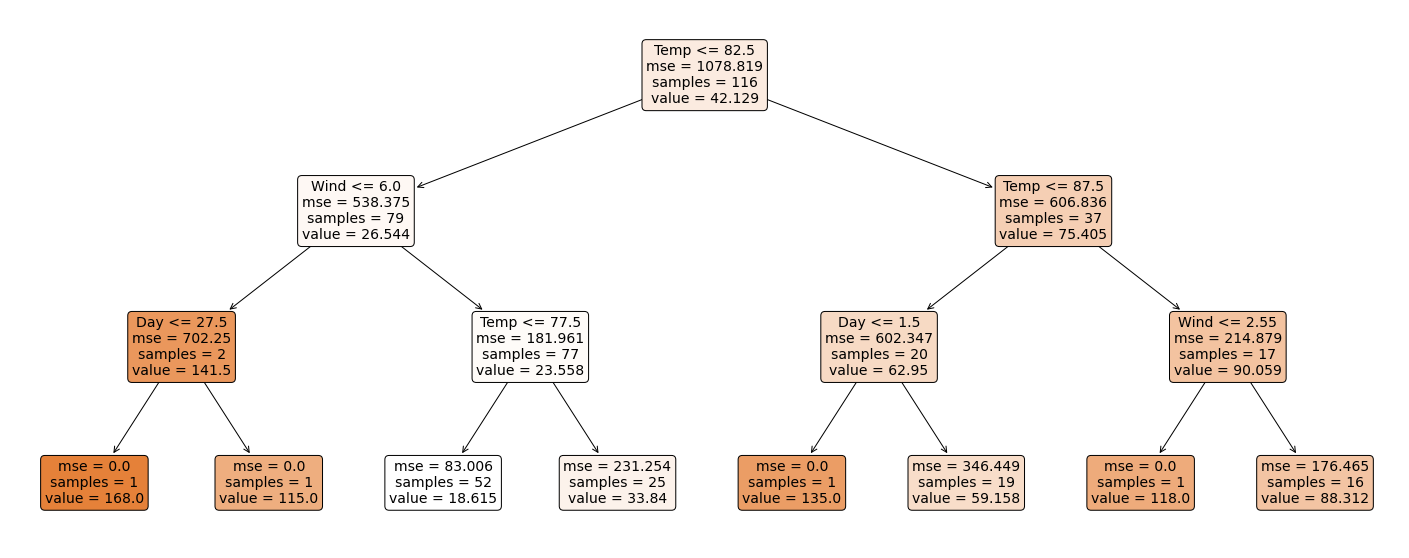

In [0]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=airq.columns.tolist()[1:], 
              class_names=airq.columns.tolist()[0], 
              filled=True, 
              rounded=True, 
              fontsize=14)

* Lets look at the decision path

  * all 1's since 1 means yes

In [0]:
print(clf.decision_path(far_left_branch.iloc[:,1:]) )

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1


* and that final leaves index must be 3:

In [0]:
print(clf.apply(far_left_branch.iloc[:,1:]) )

[3]


### 4.2.8. Diagnostics: Effects of Outliers

* if we are worried about outliers, we can use the median to calculate the min loss for the best split instead

* lets compare:

In [0]:
#prediction
y_pred = clf.predict(airq.iloc[:,1:])

findOverallLoss(pd.DataFrame(y_pred),pd.DataFrame(airq.iloc[:,0]))

0    168.134754
dtype: float64

* setting `criterion='mae'` makes the split critera based on the median square error (instead of mean)

In [0]:
clf = tree.DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=3)
clf = clf.fit(X, Y)
y_pred = clf.predict(airq.iloc[:,1:])
findOverallLoss(pd.DataFrame(y_pred),pd.DataFrame(airq.iloc[:,0]))

0    194.224138
dtype: float64

## 4.3 Ex. NYC Taxi Data

### 4.3.1. Data Prep

* parse_dates puts into into time type data and allows for faster parsing of dates

In [0]:
import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_4/train.csv'

# load CSV using pandas library
train = pd.read_csv(my_path, parse_dates =['pickup_datetime'])


# look at the first few rows and show features 
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


* store the response

In [0]:
y_train = pd.DataFrame(train.loc[:,'trip_duration'])
y_train

,trip_duration
0,455
1,663
2,2124
3,429
4,435
...,...
1458639,778
1458640,655
1458641,764
1458642,373


* lets convert the dates and times to a useful format

In [0]:
#from datetime import datetime 
#from datetime import date

* we start by extracting individual time features


* since the type is datetime64[ns]

In [0]:
train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['day'] = train['pickup_datetime'].dt.day
train['hr'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute
# convert to dummy
train.loc[train['store_and_fwd_flag'] == 'Y','store_and_fwd_flag'] = 1
train.loc[train['store_and_fwd_flag'] == 'N','store_and_fwd_flag'] = 0

* we will read in holiday features for additional info
* data, and idea for holiday extraction method source: https://www.kaggle.com/au1206/nyc-taxi-duration-prediction-using-xgboost

In [0]:
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_4/NYC_2016Holidays.csv'

holiday = pd.read_csv(my_path, sep = ';') 
holiday['Date'] = holiday['Date'].apply(lambda x: x + ' 2016')

holiday.head()

,Day,Date,Holiday
0,Friday,January 01 2016,New Years Day
1,Monday,January 18 2016,Martin Luther King Jr. Day
2,Friday,February 12 2016,Lincoln's Birthday
3,Monday,February 15 2016,Presidents' Day
4,Sunday,May 08 2016,Mother's Day


* lets create a variable to hold the holidays and rest days

In [0]:
special_days = pd.DataFrame(index = range(len(train)))  

* this function will find rest days and holidays in the columns we extracted from the date/time column

In [0]:
def find_holiday(yr, month, day, holidays):
    holiday =  [None]*len(yr)
    weekend =  [None]*len(yr)
    i = 0 
    for yy,mm,dd in zip(yr, month, day):
        weekend[i] = date(yy,mm,dd).isoweekday() in (6,7)
        holiday[i] = weekend[i] or date(yy,mm,dd)  in holidays
        i+=1
    return holiday, weekend

* the assign method from pandas creates new columns from the variables input

In [0]:
holiday,weekend = find_holiday(train.year, train.month, train.day, holidays)
special_days = special_days.assign(holiday = holiday)
special_days = special_days.assign(weekend = weekend)

print(special_days.dtypes)
#my_tab = pd.crosstab(index=special_days['holiday'],columns="count") 
#my_tab
special_days.info()

holiday    bool
weekend    bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   holiday  1458644 non-null  bool 
 1   weekend  1458644 non-null  bool 
dtypes: bool(2)
memory usage: 2.8 MB


* now we have dummies for weekends and holidays for each row of our original train data

* we can cluster pickup/dropoff locations using **kmeans**

* **kmeans** aims to partition data into k clusters where each belongs to the cluster with the nearest mean (centers/centroids)

* ***minibatch kmeans*** reduces the computation time for large data sets by not having to store the entire thing in main memory

  * uses small random batches (fixed) size and updates results (cluster centroids) in each iteration

  * learning rate decreases w/ the number of iterations

  * update is a gradient descent update


In [0]:
from sklearn.cluster import MiniBatchKMeans

coord_pickup = np.vstack(train[['pickup_latitude', 'pickup_longitude']].values)
coord_dropoff = np.vstack(train[['dropoff_latitude', 'dropoff_longitude']].values)

# get random start points
coords = np.hstack((coord_pickup,coord_dropoff))
sample_ind = np.random.permutation(len(coords))[:500000]


kmeans = MiniBatchKMeans(n_clusters=10, batch_size =10000).fit(coords[sample_ind])
train.loc[:,'pickup_dropoff_loc'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude']])
train.loc[:,'pickup_dropoff_loc'].head()
# note that these were the levels in the original df
my_tab = pd.crosstab(index=train['pickup_dropoff_loc'],columns="count") 
my_tab

col_0,count
pickup_dropoff_loc,
0,206391
1,39884
2,274676
3,274409
4,41508
5,192889
6,339736
7,26585
8,7309


* so the pickup and dropoff locations have been clustered into 9 main locations

In [0]:
y_train.head()

,trip_duration
0,455
1,663
2,2124
3,429
4,435


In [0]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hr,minute,pickup_dropoff_loc
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016,3,14,17,24,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016,6,12,0,43,5
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016,1,19,11,35,5
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016,4,6,19,32,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016,3,26,13,30,2


In [0]:
train = train[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_dropoff_loc','store_and_fwd_flag']]
train  = pd.concat([train ,special_days],axis=1)
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_dropoff_loc,store_and_fwd_flag,holiday,weekend
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6,0,False,False
1,1,1,-73.980415,40.738564,-73.999481,40.731152,5,0,True,True
2,2,1,-73.979027,40.763939,-74.005333,40.710087,5,0,False,False
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,0,False,False
4,2,1,-73.973053,40.793209,-73.972923,40.782520,2,0,True,True


* looks fine!

In [0]:
#save rows
rows0=train.shape[0]

* lets look at a histogram of the trip distance
* always check for 'dirty data'

(array([232835., 429537., 311541., 191615., 113204.,  66342.,  39112.,
         23590.,  15166.,  10167.,   6785.,   4562.,   3183.,   2187.,
          1505.,   1096.]),
 array([  10,  310,  610,  910, 1210, 1510, 1810, 2110, 2410, 2710, 3010,
        3310, 3610, 3910, 4210, 4510, 4810]),
 <a list of 16 Patch objects>)

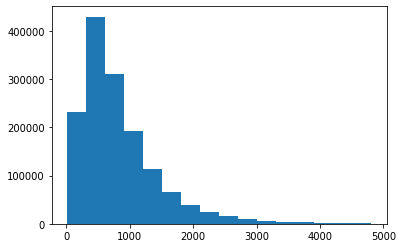

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(y_train.loc[:,'trip_duration'].values, bins=np.arange(10,5000,300))

* lets remove rows with trips greater than 2 hours because they could be an error or not represntative

In [0]:
train = train.loc[(y_train.loc[:,'trip_duration'] <= 7200),:]
y_train = y_train.loc[(y_train.loc[:,'trip_duration'] <= 7200),:]

In [0]:
rows0 - y_train.shape[0]

2253

* this is taxi data from a different year than in the textbook so more rows to start means more rows removed

### 4.3.2. Tree-Based Anlysis

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import tree
x_train, x_test, y_train, y_test = train_test_split(train,y_train, test_size=5000)

In [0]:
x_test.shape

(5000, 10)

In [0]:
def findOverallLoss(ypreds,Y):
  err = abs(ypreds.reset_index(drop=True).T - Y.reset_index(drop=True).values.squeeze())
  MAPE = err.mean(axis=1)
  return MAPE

In [0]:
clf = tree.DecisionTreeRegressor(max_depth=20)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
findOverallLoss(pd.DataFrame(y_pred),pd.DataFrame(y_test))

0    272.20226
dtype: float64

* may have needed to convert holiday and weekend to dummies...



In [0]:
y_test.values.mean()

839.496

* if we just guessed the mean

In [0]:
test=pd.DataFrame([ y_test.values.mean() for i in range(0,y_test.shape[0])])
findOverallLoss(pd.DataFrame(y_pred),pd.DataFrame(test))

0    439.771324
dtype: float64

### 4.3.3. Embeddings

* embeddings can be used to encode categorical or discrete variables as a continuous vector of lower dimension


* since I used nyc data from a different year here it doesnt really apply, but if we had (say) 40k zip codes
we may want to replace this by income or age which would capture the distribution while reducing the number of categories

* one problem with one-hot encoding is that similar categories ar enot placed closer together in feature space

  * oridinal variables could be better represented as continuous and make use of the similarities between entities



## 4.4. Forest Cover Data

* lets look at a clasification problem

* in this data we are predicting the forest cover given 54 features such as elevation, shade, distance, water

In [0]:
import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_4/covtype.data'

# load CSV using pandas library
train = pd.read_csv(my_path,header=None)


# look at the first few rows and show features 
train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
train.shape

(581012, 55)

In [0]:
train.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
41    int64
42    int64
43    int64
44    int64
45    int64
46    int64
47    int64
48    int64
49    int64
50    int64
51    int64
52    int64
53    int64
54    int64
dtype: object

* convert response variable (cover type of forest) to factor 

In [0]:
train.iloc[:,54]=train.iloc[:,54].astype('category')
pd.DataFrame(train.iloc[:,0:54])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6)

clf = clf.fit(train.iloc[:,0:54], pd.DataFrame(train.iloc[:,54]))
y_pred = clf.predict(train.iloc[:,0:54])


* we would only be correct less than 50% of the time if we guessed everyhting ot be cover type 2 (the max)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pd.DataFrame(train.iloc[:,54]), pd.DataFrame(y_pred))

array([[158304,  49858,     90,      0,     53,      5,   3530],
       [ 65797, 212829,   3880,      6,    419,     62,    308],
       [     0,   4002,  31382,    263,      7,    100,      0],
       [     0,     20,   1858,    869,      0,      0,      0],
       [    93,   8511,    322,      0,    567,      0,      0],
       [     0,   4618,  12060,     88,      0,    601,      0],
       [  8931,    380,      0,      0,      0,      0,  11199]])

## 4.5. How the Splitting is Done

### Attribute Selection Techniques

* there are different ***attributes selection measures*** used to identify the best attribute to use as the  root node at each level

  * the better the strategy, the higher the classifcation accuracy of the tree

---

* the selection of the split that is made is the one that results in the most ***homogeneous sub-nodes*** (or the highest ***purity*** with respect to the target variable)

* common methods include: 
  * ID3 (extension of D3)
  * C4.5 (successor of ID3)
  * CART (Classification And Regression Tree)
  * CHAID (Chi-square automatic interaction detection)
  * MARS (multivariate adaptive regression splines)


* these algorithms use a criteria such as: **Entropy, Information gain, Gini index**, Gain Ratio, Reduction in Variance, or Chi-Square to measure which attribute is the best to place at a given root

  * we have different methods for regression and for classification

  * `sklearn` DT classifier allows for `gini` for the **Gini index** or `entropy` for the **information gain** (as the input for `criterion`) so we can do a quick intro to each of these

  * `sklearn` DT regressor allows for mse, friedman_mse or mae (as the input for `criterion`) which basically all use a variation of variance reduction feature selection (which calculates the error to measure the quality of a split)

* `sklearn`  also allows us to set `spliiter= Best` to choose the best split strategy for our data

### Entropy

***Entropy*** is a measure of the amount of *randomness* in the information being processed,


![alt text](https://miro.medium.com/max/498/0*0EjpvqWE7YcGDOIQ.png)


* for example, in the graph of entropy above, when the probability is 0 entropy is 0, but when probability is 0.5 entropy is 100%


* entropy can be calculated mathematically for each attribute S as a function of the probability of each class i as shown below

![alt text](https://miro.medium.com/max/892/0*BdgOokoatW17zEK7.png)


* And, if we have multiple classes, we can calculate the entropy between 2 attributes as folllows:

![alt text](https://miro.medium.com/max/982/0*d-tAV4Ci2D2mzhrg.png)

* eg. it makes sense that overcast would not contribute to randomness since play golf is always yes (in that case)



### Information Gain

![alt text](https://miro.medium.com/max/1400/0*EfweHd4gB5j6tbsS.png)


* information gain measures how much entropy changes with a given split 

![alt text](https://miro.medium.com/max/1244/1*Pc3S9yJPxrKvCkobQc8t0g.png)


### Gini Index

![alt text](https://miro.medium.com/max/834/1*QF-JeWpQQ86xhRhseHGecg.png)

* makes binary splits with category success or failure, where p is the probability of a success

### 4.6.2. Bias-Variance Tradeoff

* larger trees have fewer data points per node meaning less bias and higher variance 

* what can we do about this?

* 1) the `maxdepth` parameter can be reduced to reduce variance

* 2) a reduction in variance algorithm can be used for continuous target variables to choose the best split

  * calculates variance as normal  using the form

### Avoiding Overfitting

* overfiting can happen when there is no limit on the depth so that it represents the training set exactly (eg. one leaf per observation)

* 2 common methods to remove overfitting include

  1) pruning (trim off branches so as to retain accuracy (eg. choose validation set and adjust accordingly)

  ![alt text](https://miro.medium.com/max/1400/1*TxzPx2UmUdhKieWruQ1prA.png)

  2) random forest (next chapter)


Sec. 4.5 images source: https://miro.medium.com/max/1400/1*TxzPx2UmUdhKieWruQ1prA.png

## 4.7  Fine Tuning

* The `min_samples_split` input allows us to set a threshold on the number of samples to make a split at a node

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(airq.iloc[:,1:]), pd.DataFrame(airq.iloc[:,0]), test_size=0.25)

* another thing we can do is set a minimum # for the number of samples to have a leaf

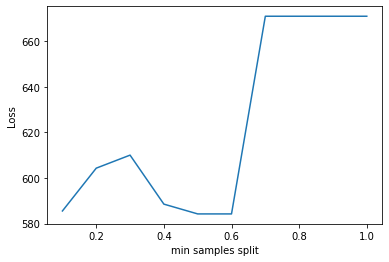

,0
0,585.510504
1,604.280347
2,609.995160
3,588.511499
4,584.219948
5,584.219948
6,670.883010
7,670.883010
8,670.883010
9,670.883010


In [0]:
min_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

all = pd.DataFrame()
for min_split in min_splits:
   clf = tree.DecisionTreeRegressor(min_samples_split=min_split)
   clf = clf.fit(x_train, y_train)
   y_pred = clf.predict(x_test)
   loss = findOverallLoss(pd.DataFrame(y_pred),pd.DataFrame(y_test))
   row = pd.DataFrame(loss).T
   all = [all, row]
   all = pd.concat(all,axis=0,ignore_index=True)
   


from matplotlib.legend_handler import HandlerLine2D
plt.plot(min_splits, all,  label="Loss")
plt.ylabel('Loss')
plt.xlabel('min samples split')
plt.show()
all

* look like the min is around 0.5% of samples

* lets look at that tree

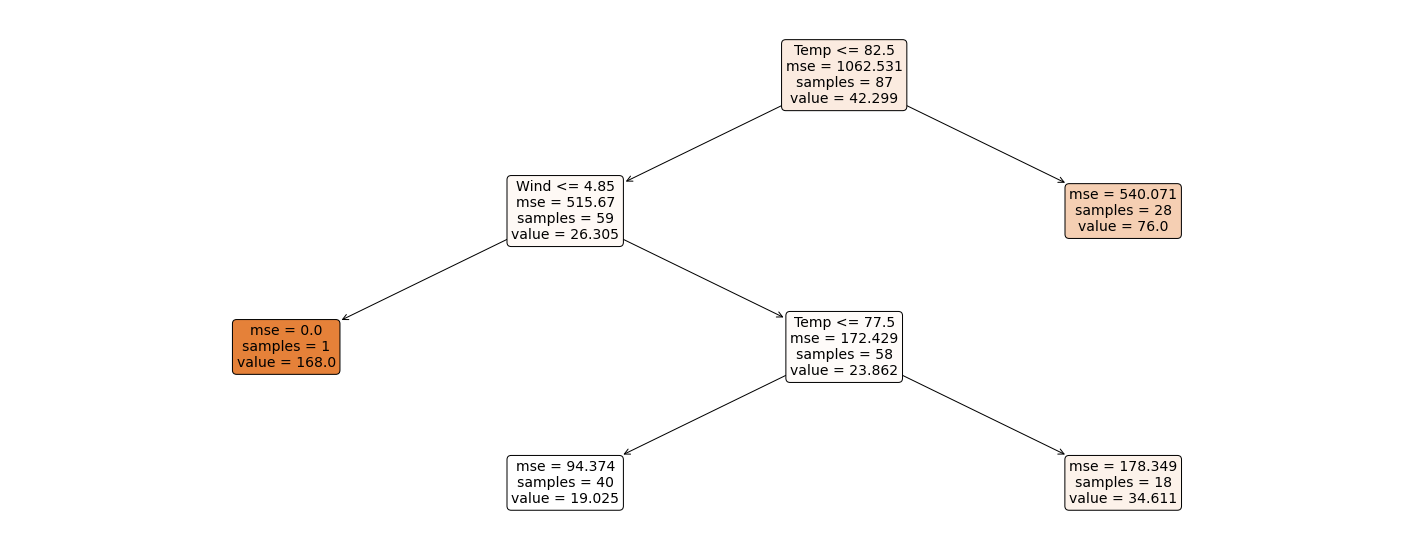

In [0]:
clf = tree.DecisionTreeRegressor(min_samples_split=0.5)
clf = clf.fit(x_train, y_train)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=airq.columns.tolist()[1:], 
              class_names=airq.columns.tolist()[0], 
              filled=True, 
              rounded=True, 
              fontsize=14)

Similarily, the `min_samples_leaf` input to the sklearn DT allows us to input a minimum number of samples required to create a leaf. HW assignment on this :)